
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## Selection of extreme overtopping events for LisFlood


inputs required: 
  * HyCReWW-Q overtopping estimation of historical events

in this notebook:
  * Remove negligible overtopping values for each profile (Q < 1 l/s/m)
  * Sum overtoping from all profiles and select "extreme" events (Qsum > 0 l/s/m) 
  * Transform l/s/m into m3/s/m for LisFlood
  

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
#from teslakit.extremes import Peaks_Over_Threshold as POT




## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/albacid/Projects/TeslaKit_projects'
db = Database(p_data)

# set site
db.SetSite('KWAJALEIN')


# --------------------------------------
hist_Q_wavesH= xr.open_dataset(op.join(p_data, 'sites/KWAJALEIN/HYCREWW/hist_Q_wavesH.nc'))

print(hist_Q_wavesH)


<xarray.Dataset>
Dimensions:  (profile: 36, time: 350268)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-16T11:00:00
  * profile  (profile) float64 1.0 2.0 3.0 4.0 5.0 ... 32.0 33.0 34.0 35.0 36.0
Data variables:
    hs       (profile, time) float64 ...
    tp       (profile, time) float64 ...
    dir      (profile, time) float64 ...
    bslope   (profile, time) float64 ...
    rslope   (profile, time) float64 ...
    rwidth   (profile, time) float64 ...
    cf       (profile, time) float64 ...
    Zb       (profile, time) float64 ...
    level    (profile, time) float64 ...
    hs_lo2   (profile, time) float64 ...
    Q        (profile, time) float64 ...
    Qinv     (profile, time) float64 ...


### Plot

In [3]:

# Remove values in each profile where Q<1 l/s (neglegible)
hist_Q_wavesH['Qinv'] = hist_Q_wavesH.Qinv.where(hist_Q_wavesH.Qinv.values>=1, 0)


# Sum all profiles
Q_all = hist_Q_wavesH.Qinv.sum(dim='profile')


# POT: Select all values where Qsum > 0 l/s
Q_all = Q_all.where(Q_all>0, np.nan)


# Select extreme events for each profile
for p in hist_Q_wavesH.profile.values:
    
    temp = hist_Q_wavesH.Qinv.sel(profile=p)
    temp = temp.where(~np.isnan(Q_all.values), np.nan)
    
    if p == 1:
        output = temp
    else:
        output = xr.concat([output, temp], dim='profile')
        
print(output)    


<xarray.DataArray 'Qinv' (profile: 36, time: 350268)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-16T11:00:00
  * profile  (profile) float64 1.0 2.0 3.0 4.0 5.0 ... 32.0 33.0 34.0 35.0 36.0


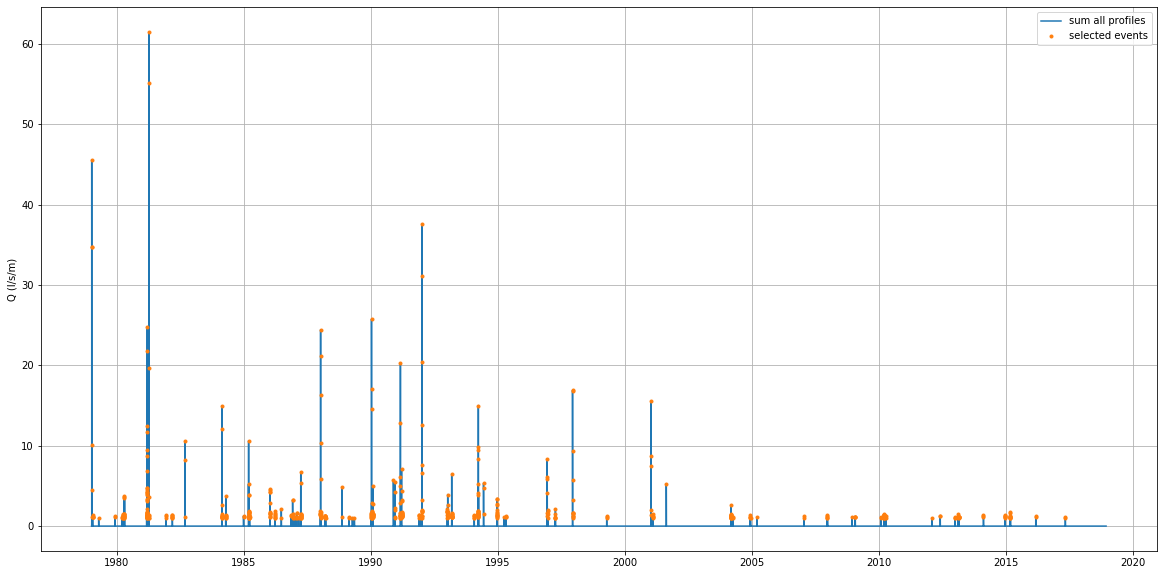

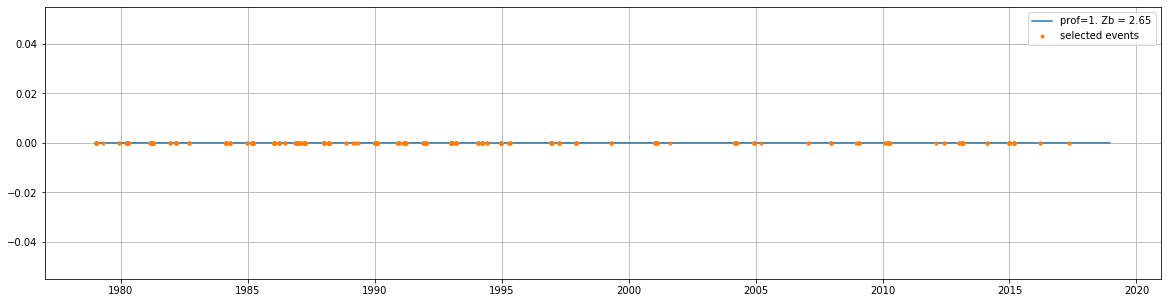

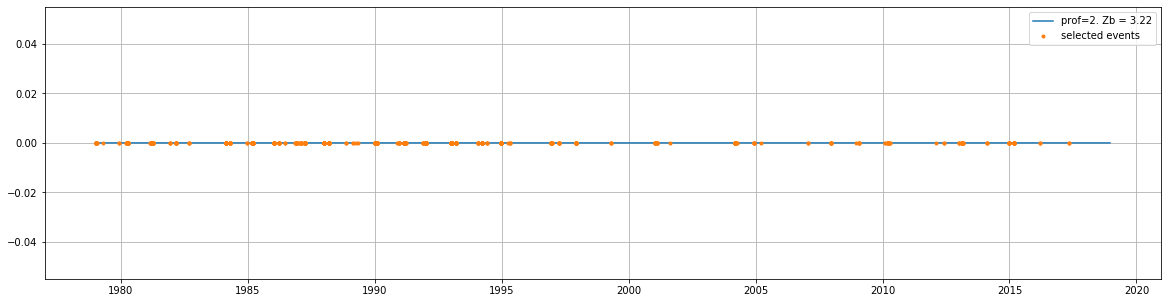

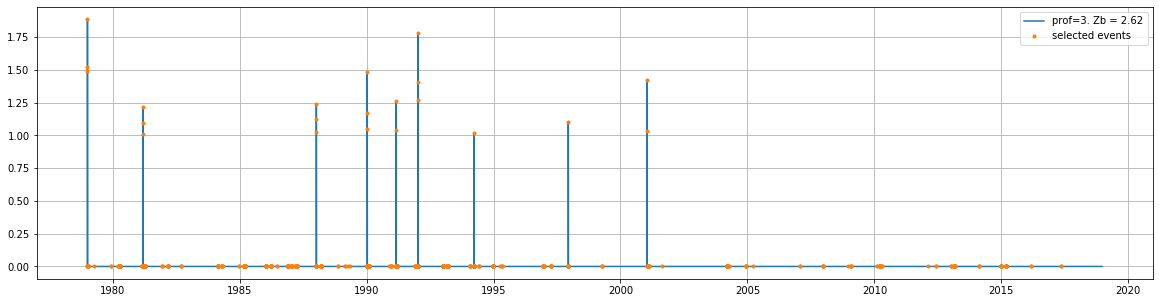

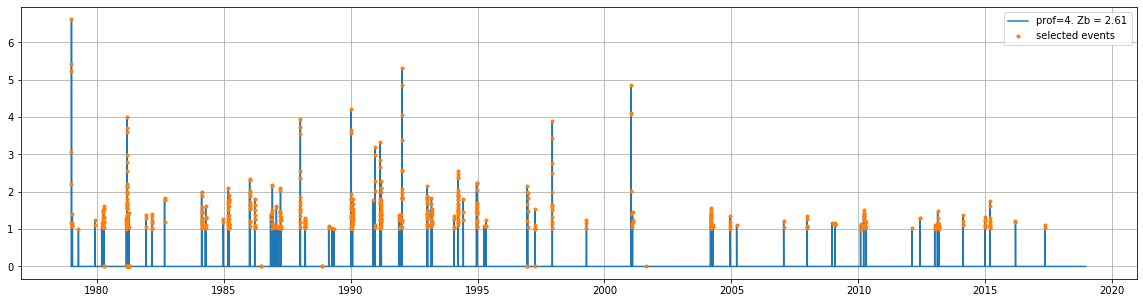

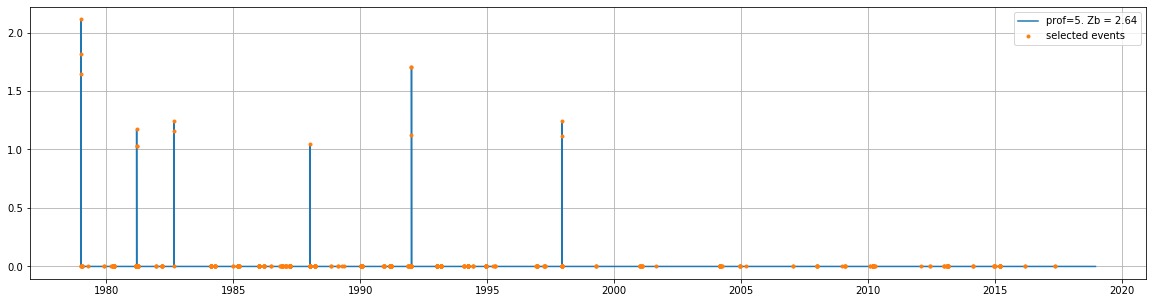

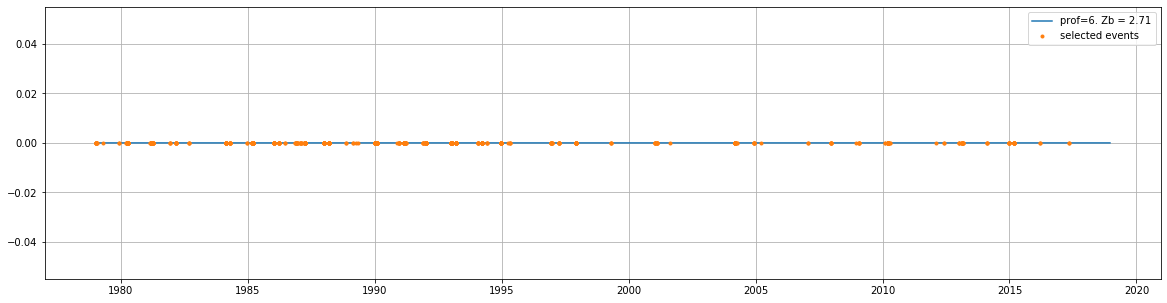

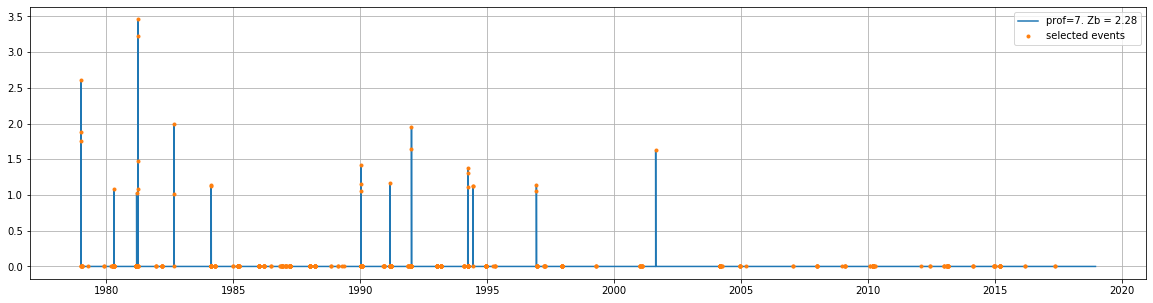

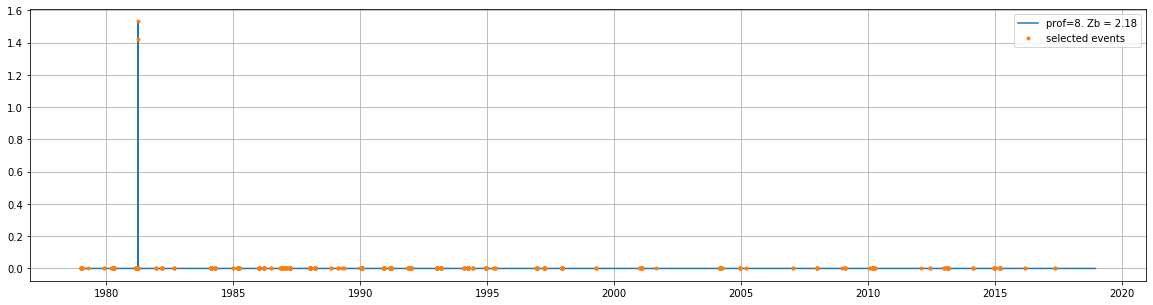

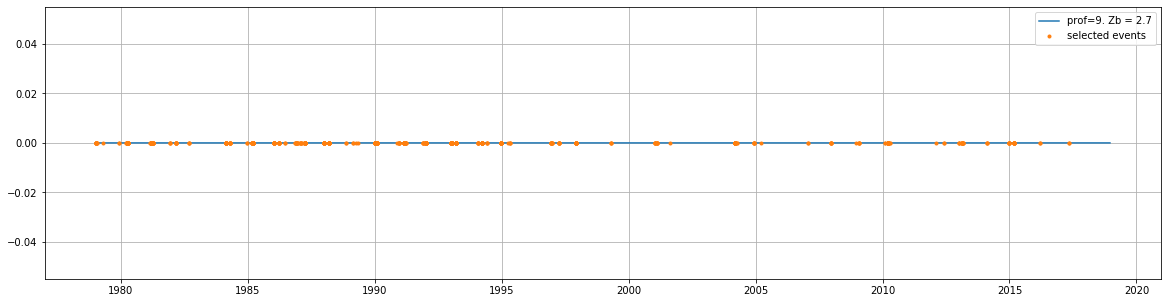

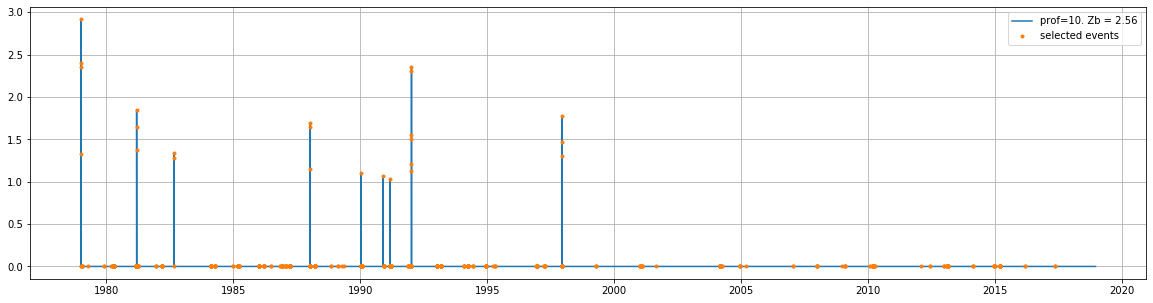

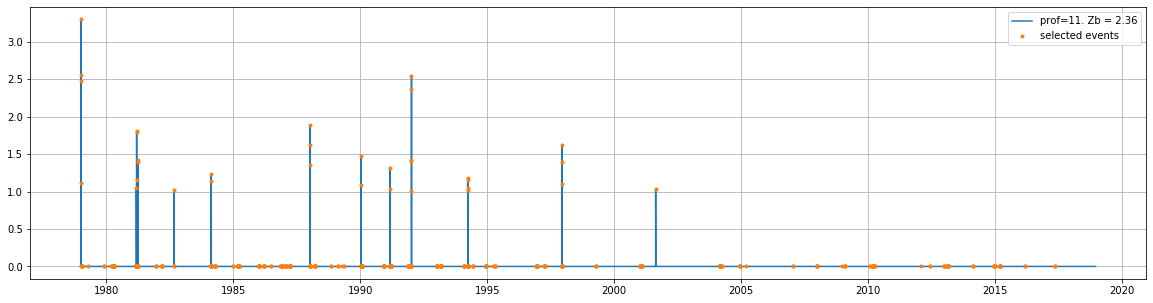

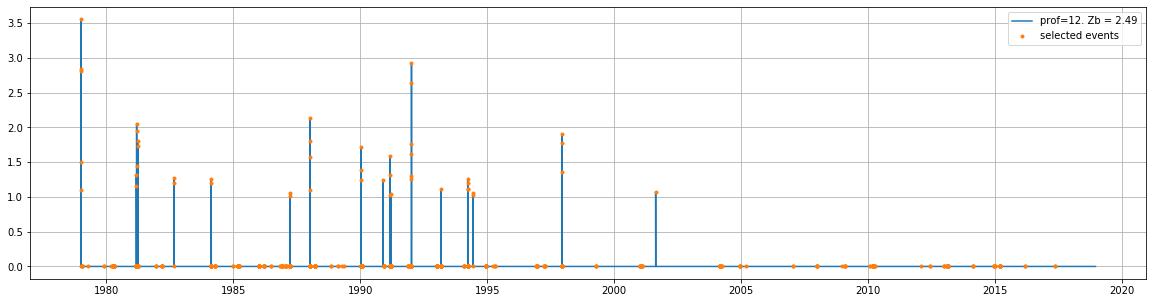

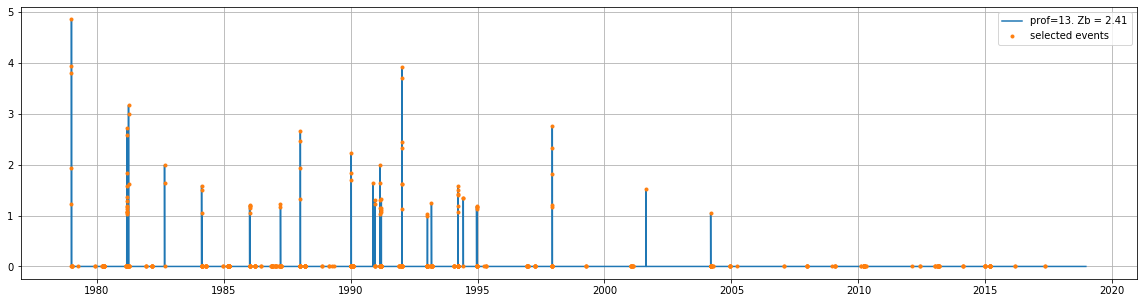

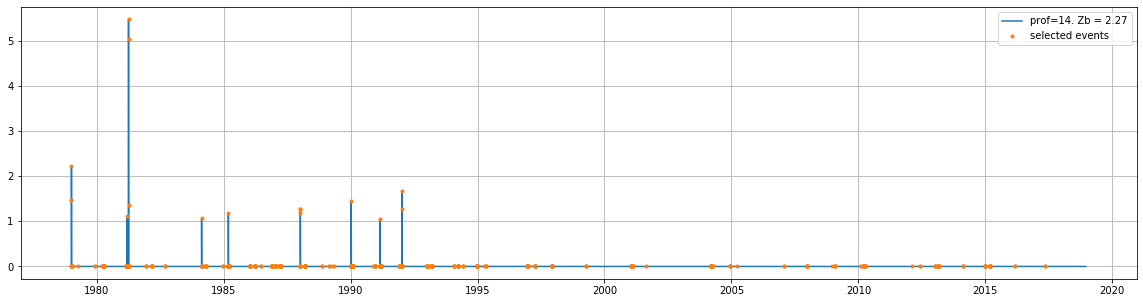

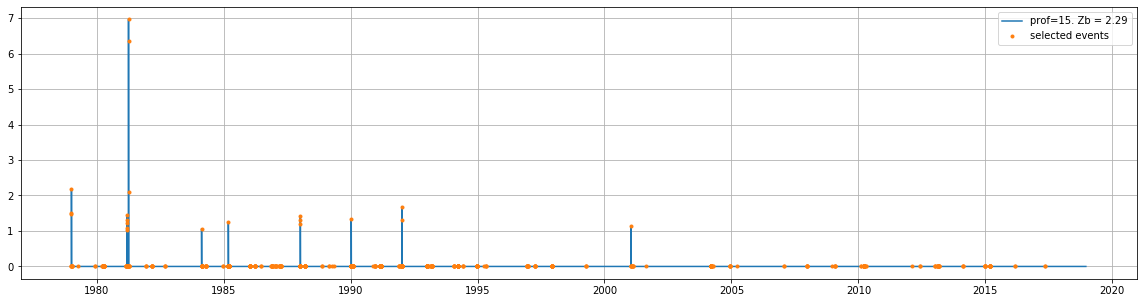

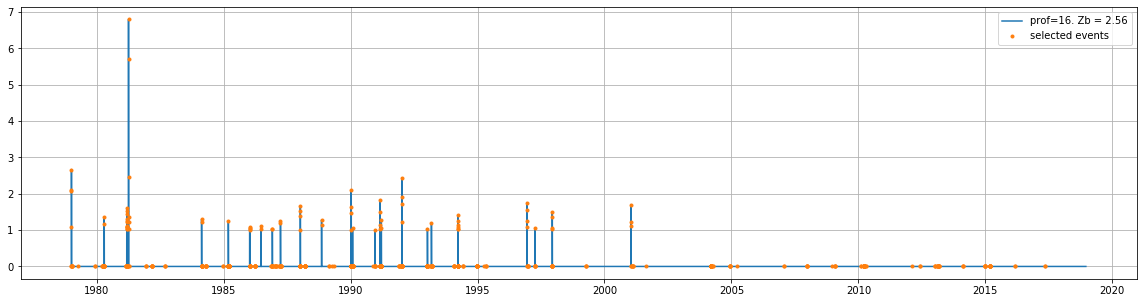

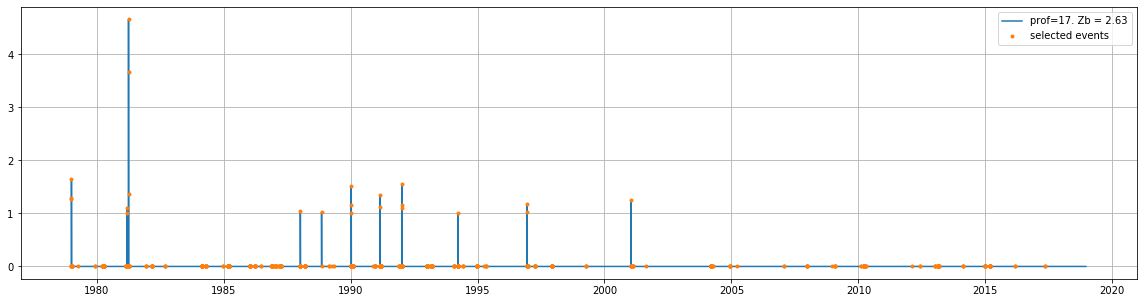

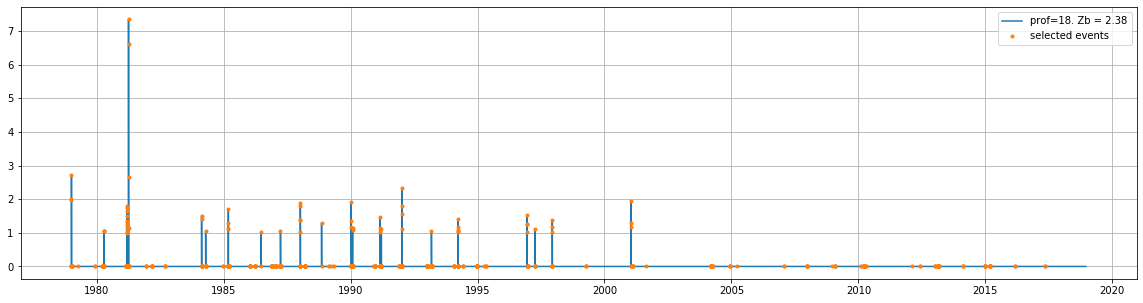

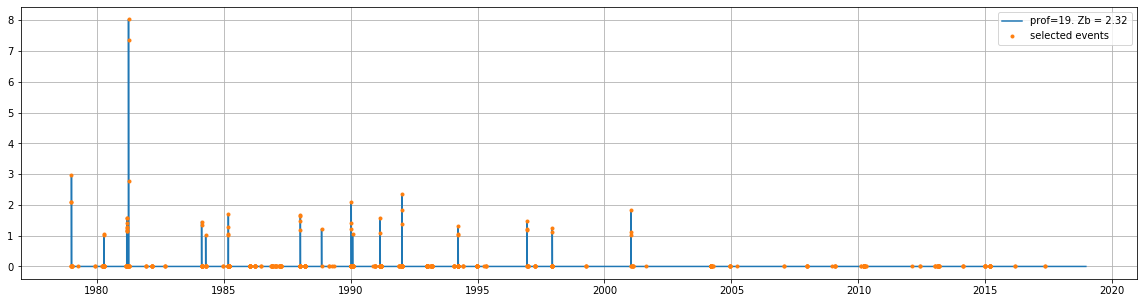

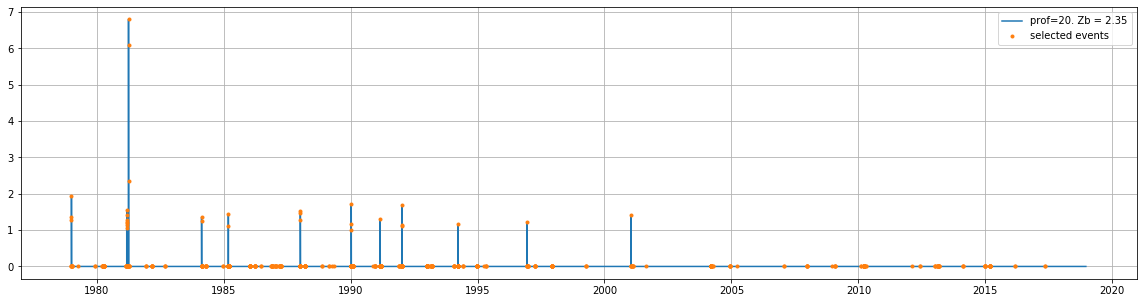

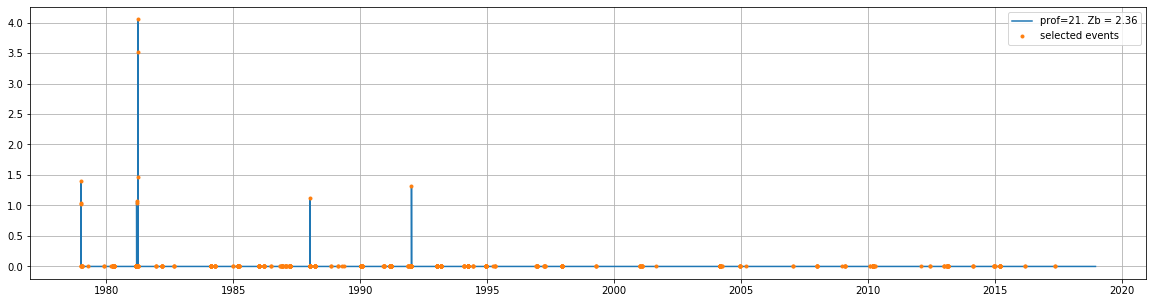

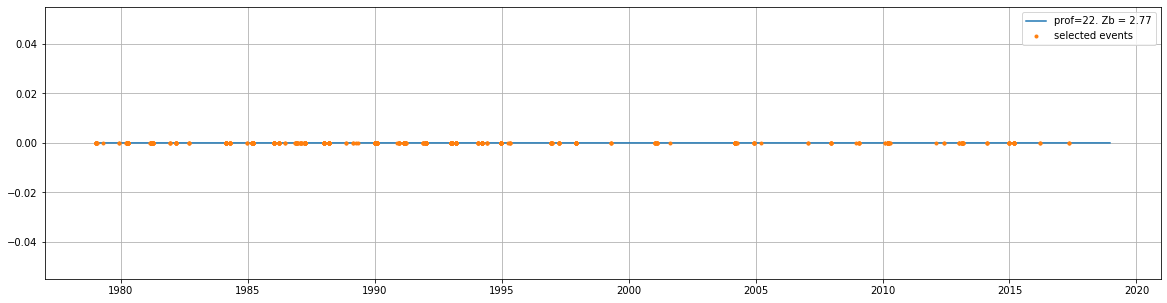

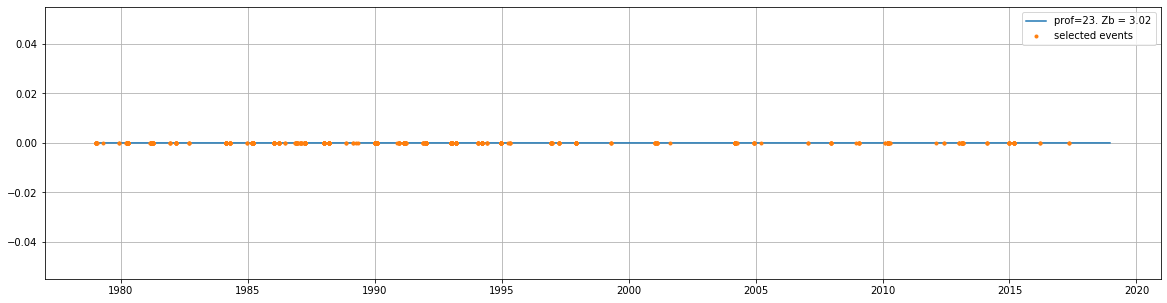

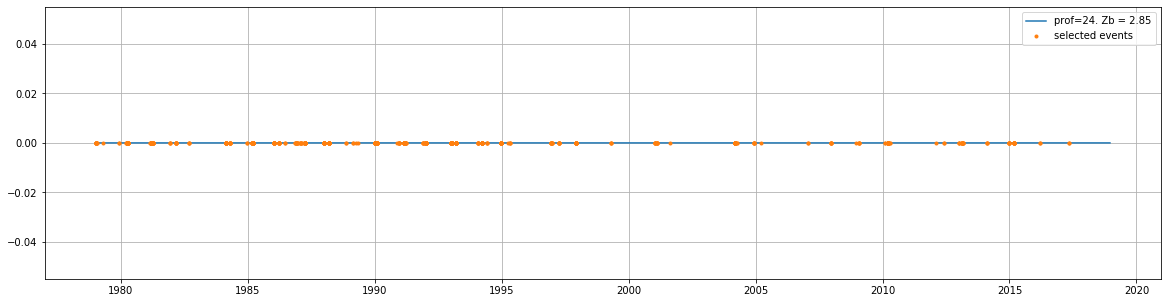

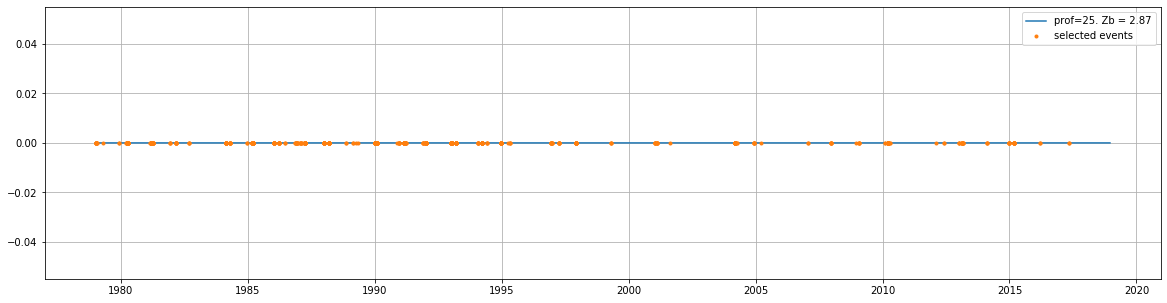

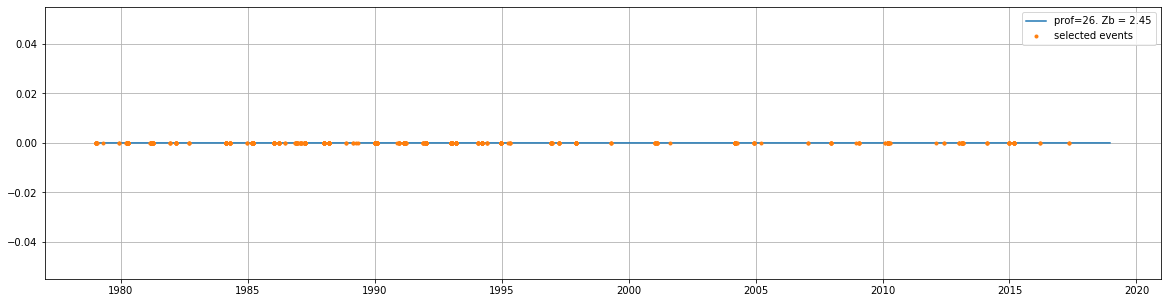

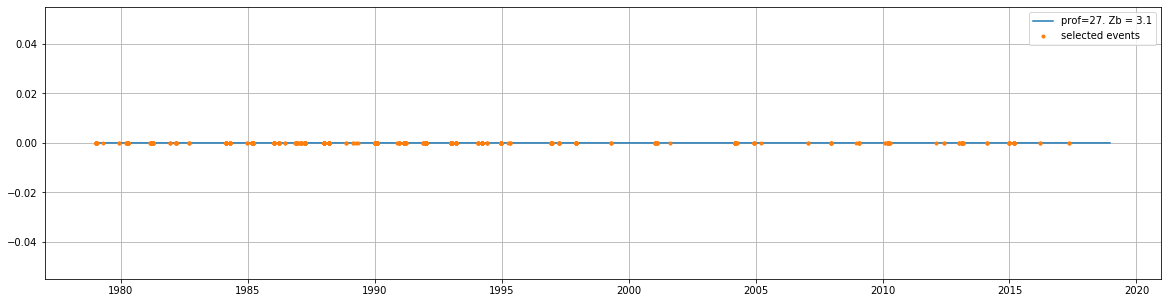

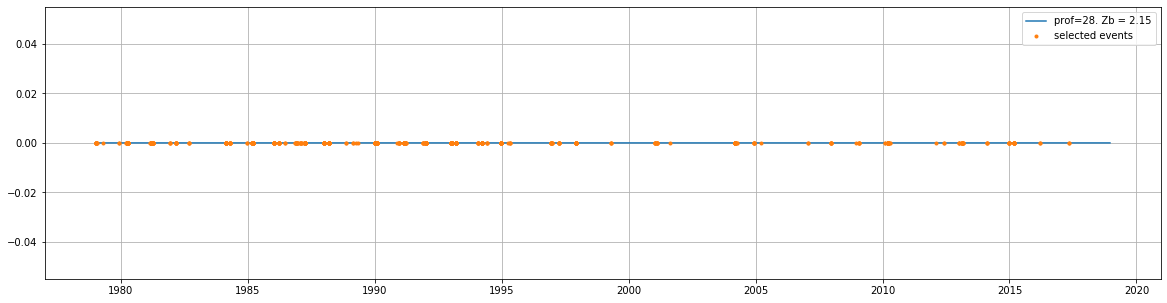

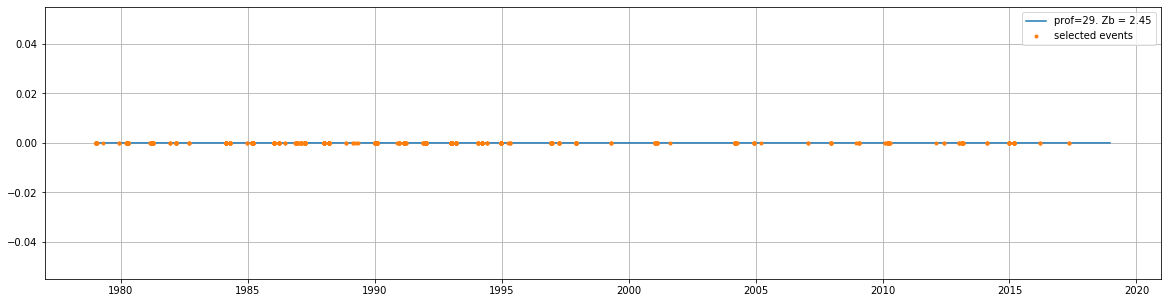

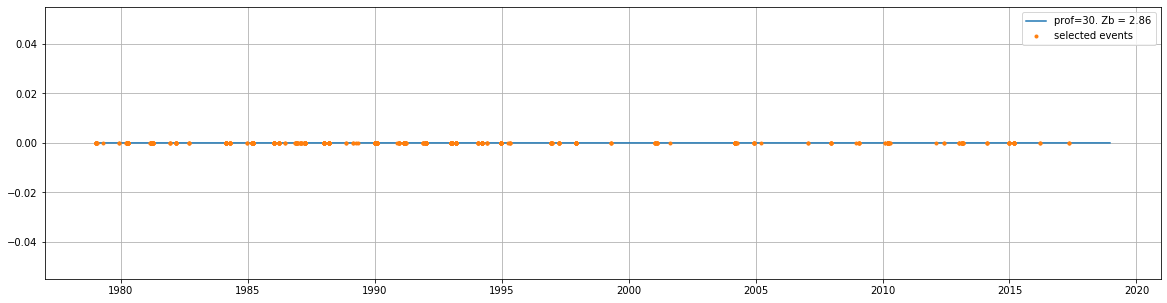

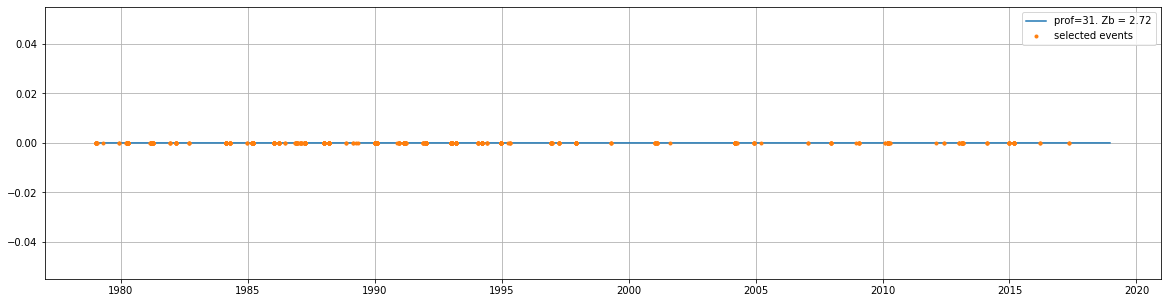

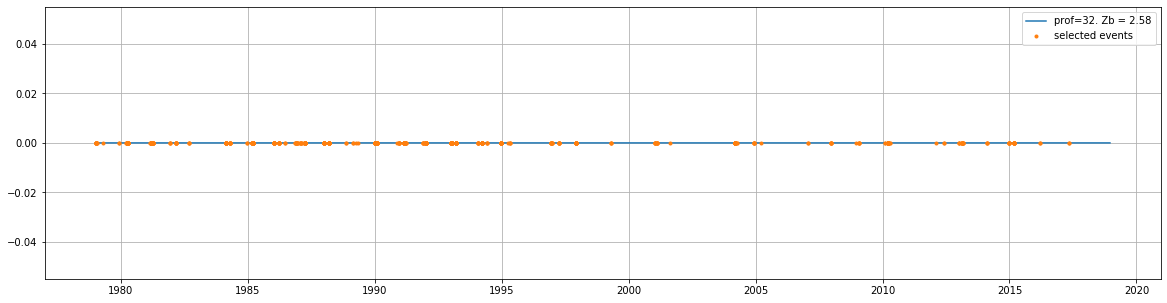

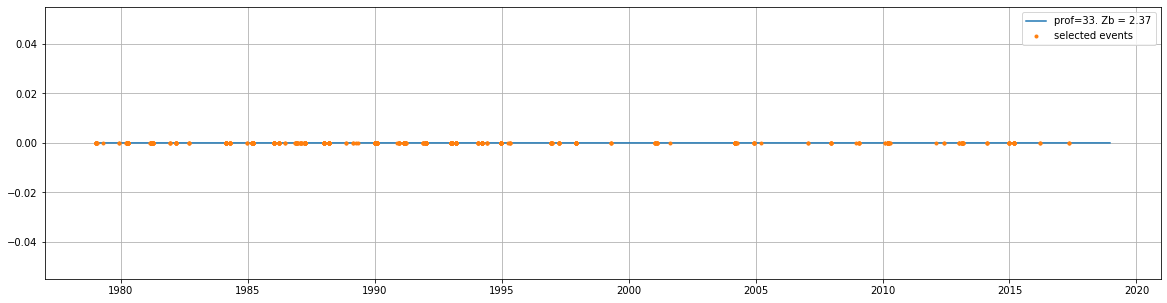

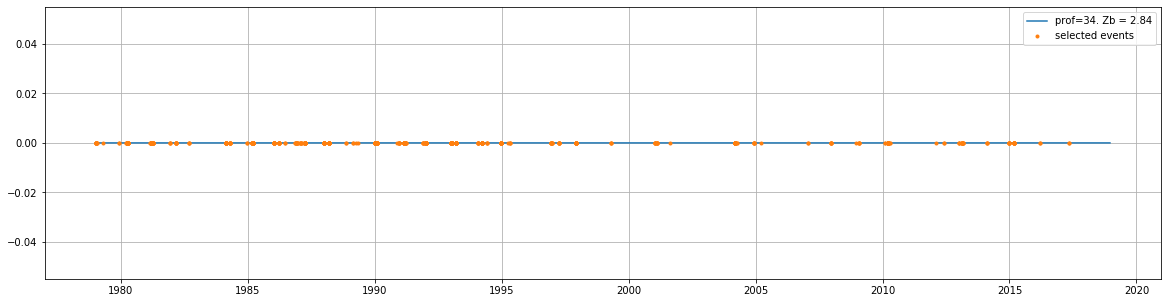

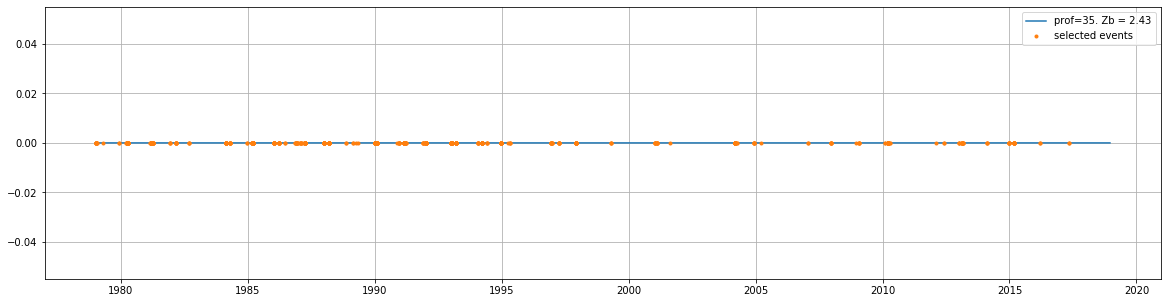

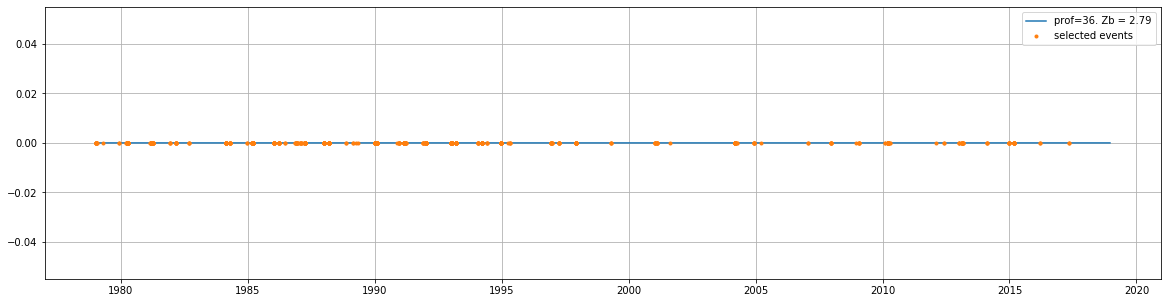

In [4]:
# plot

plt.figure(figsize=(20,10))
plt.plot(hist_Q_wavesH.time, hist_Q_wavesH.Qinv.sum(dim='profile'), label='sum all profiles')
plt.plot(Q_all.time, Q_all.values, '.',label='selected events')
plt.legend()
plt.grid()
plt.ylabel('Q (l/s/m)')

for p in range(1,37):        
    plt.figure(figsize=(20,5))
    plt.plot(hist_Q_wavesH.time, hist_Q_wavesH.Qinv.sel(profile=p), label=('prof=' + str(p) + '. Zb = ' + str(round(hist_Q_wavesH.Zb.sel(profile=p).values[0],2))))
    plt.plot(output.time, output.sel(profile=p), '.', label='selected events')    
    plt.legend()
    plt.grid()


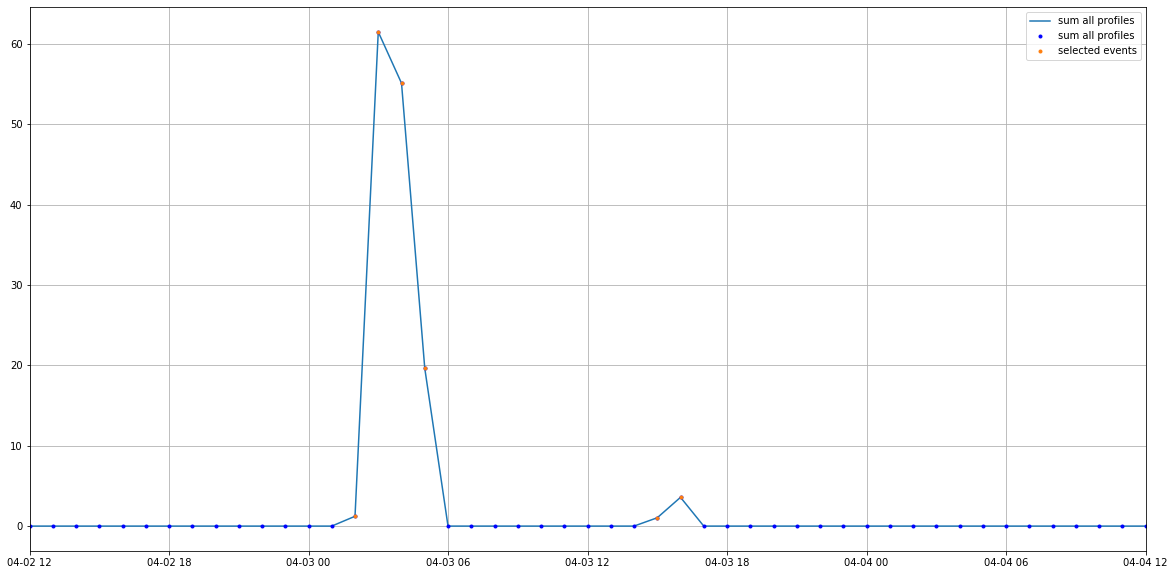

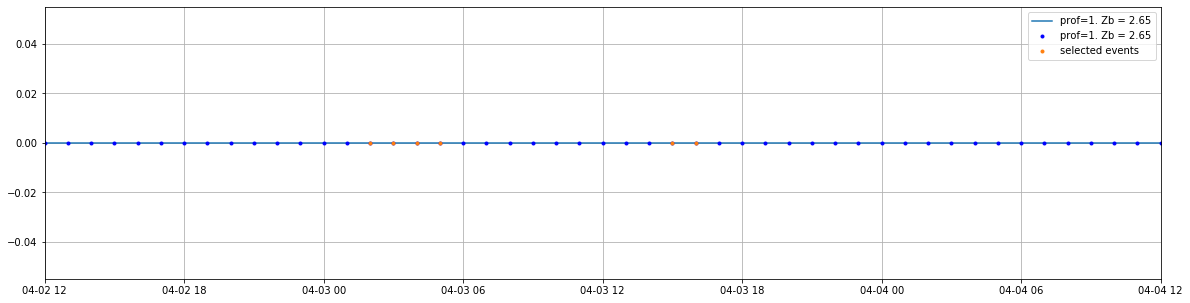

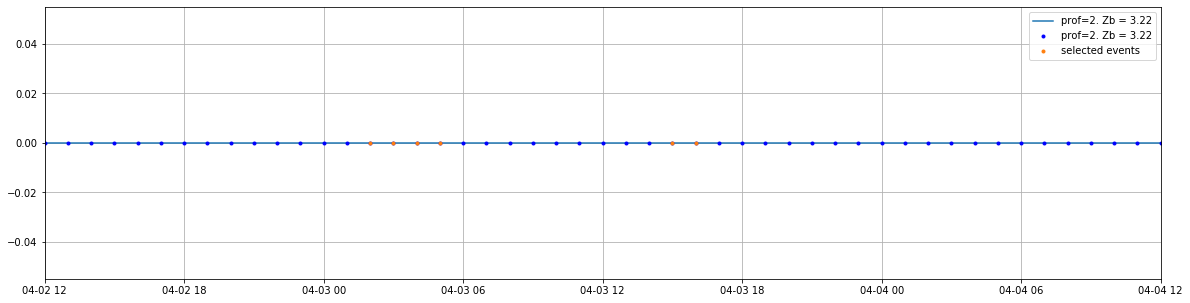

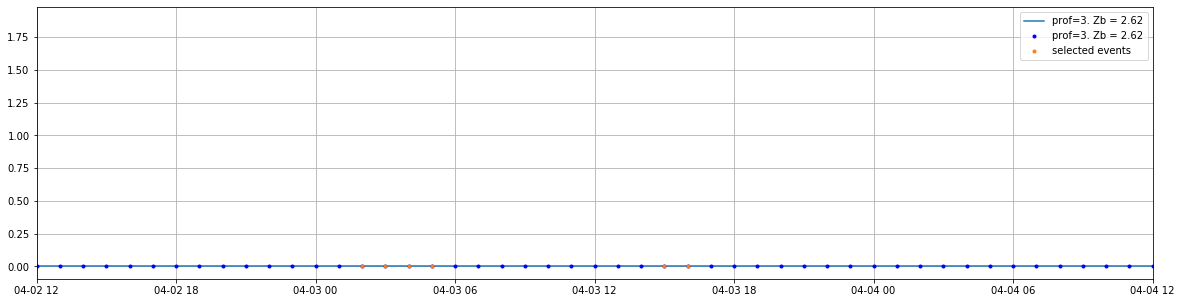

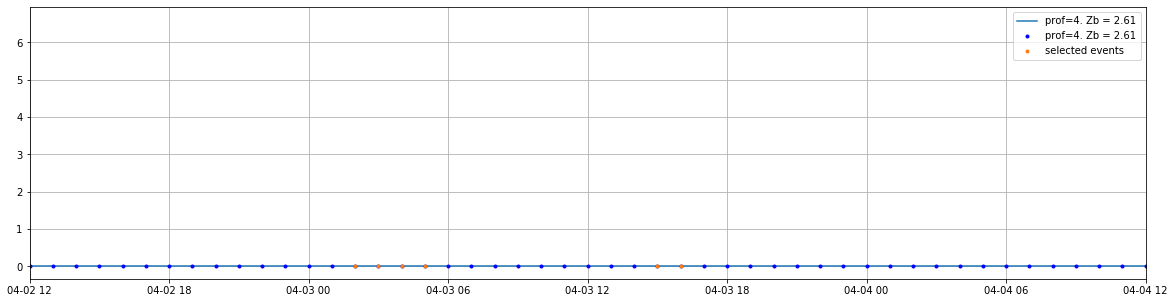

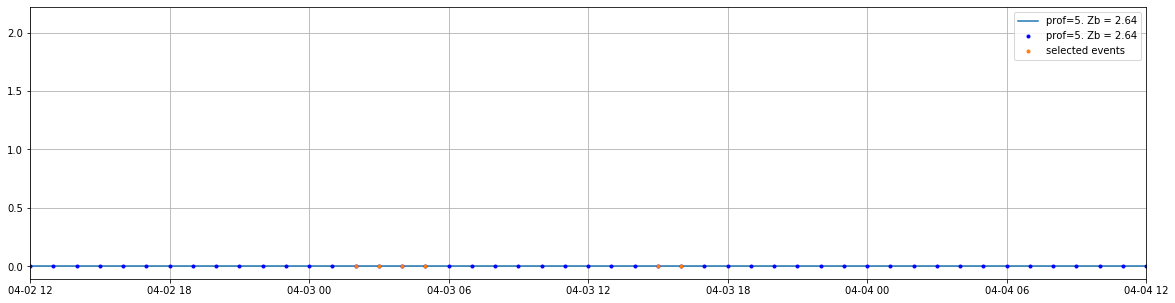

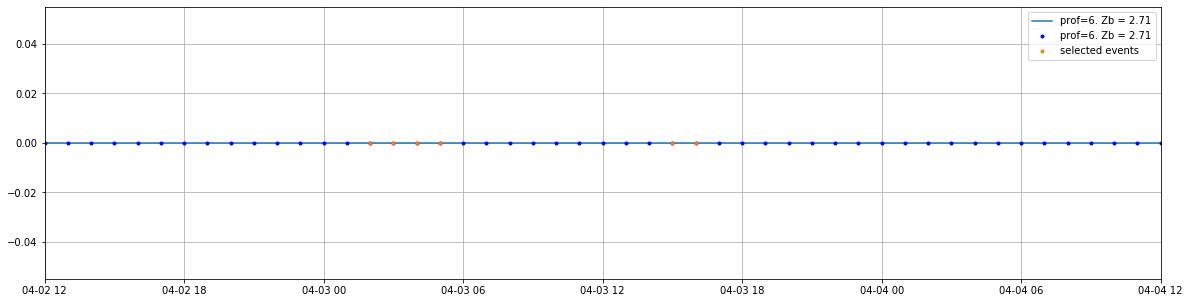

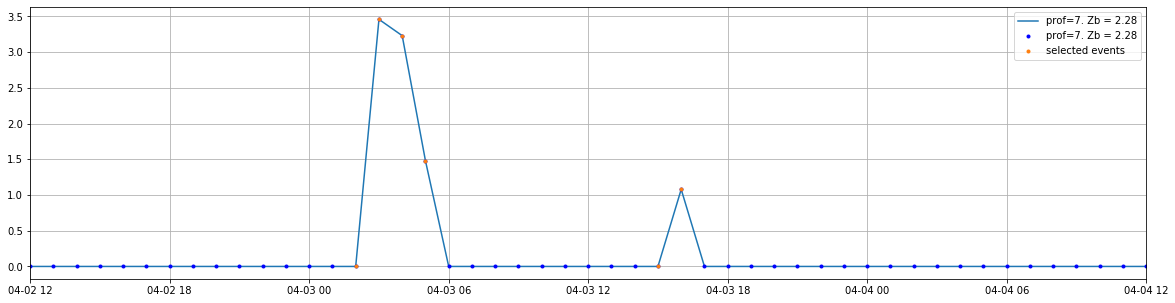

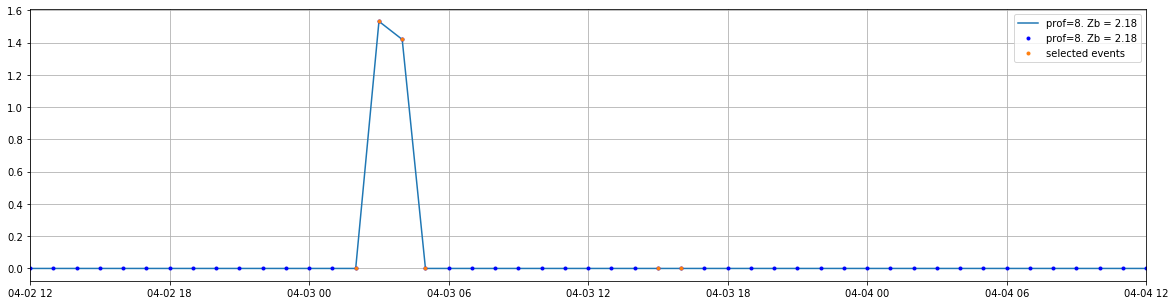

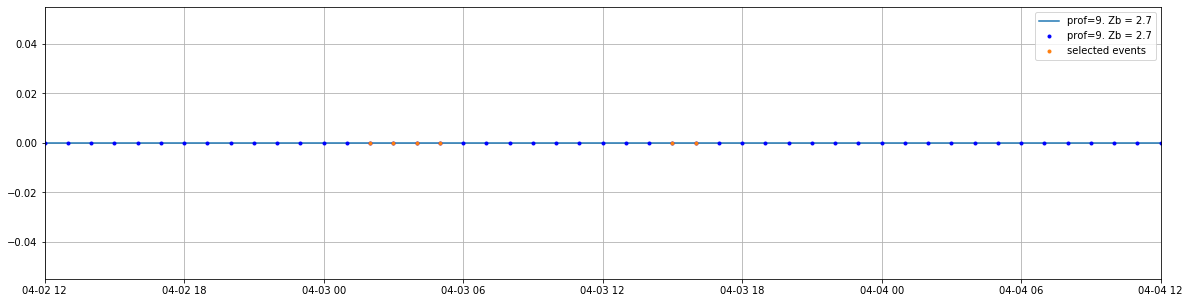

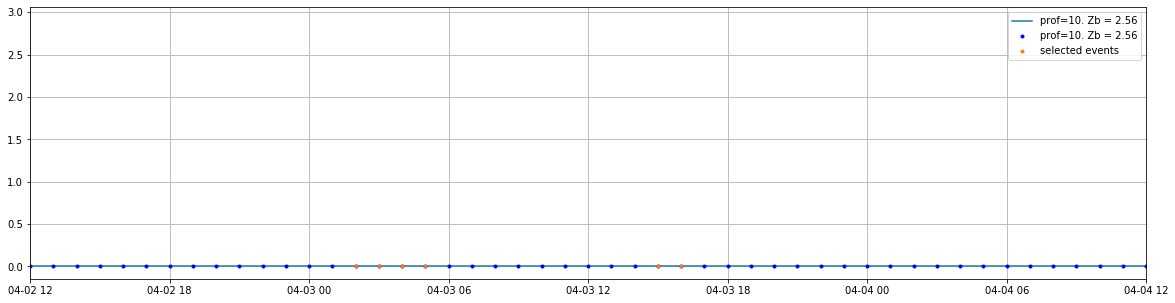

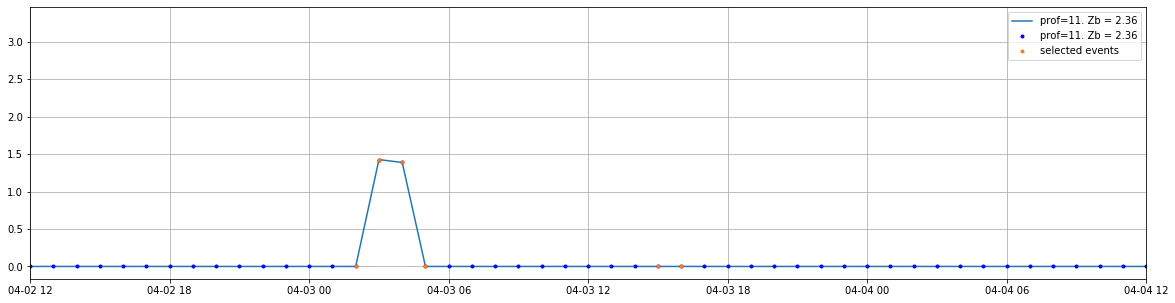

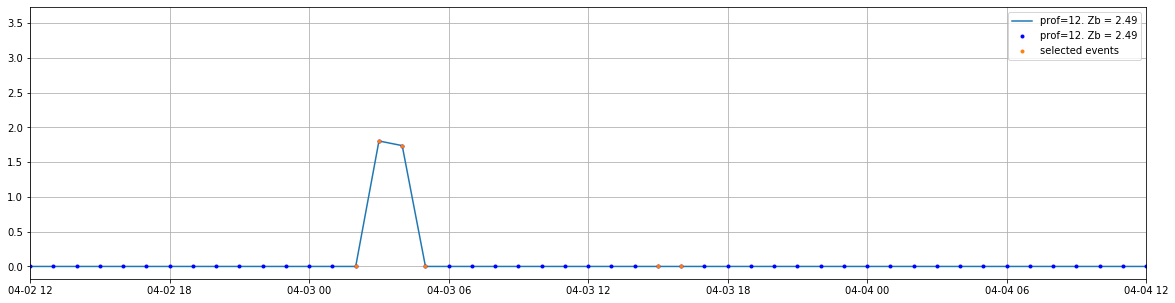

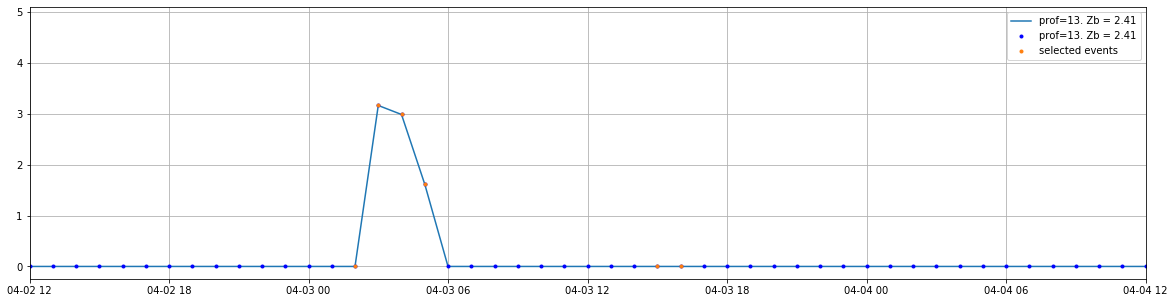

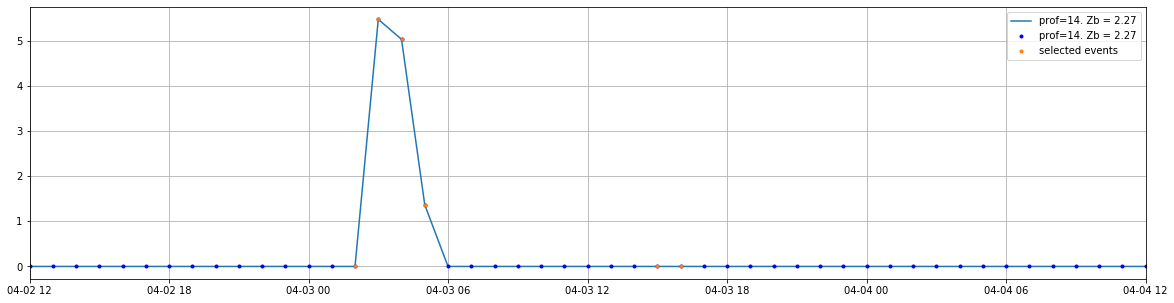

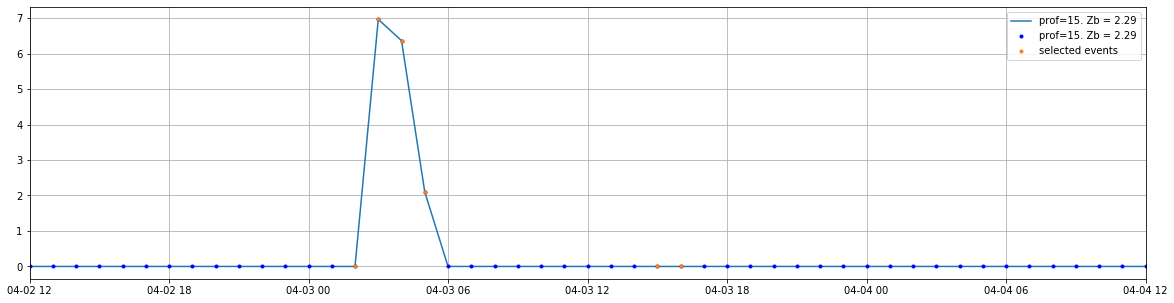

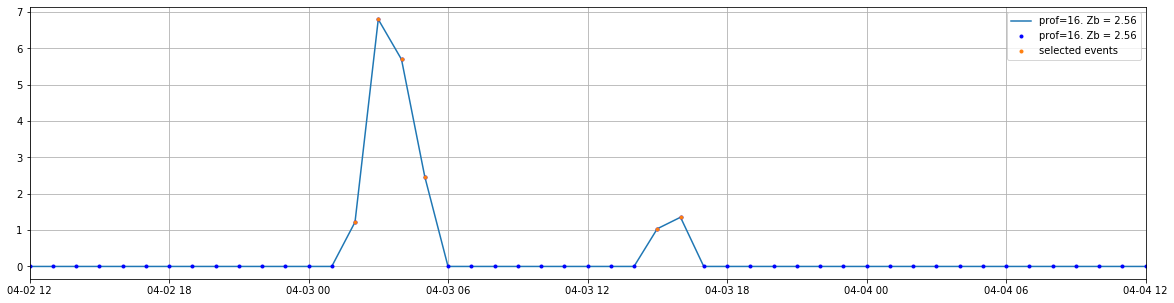

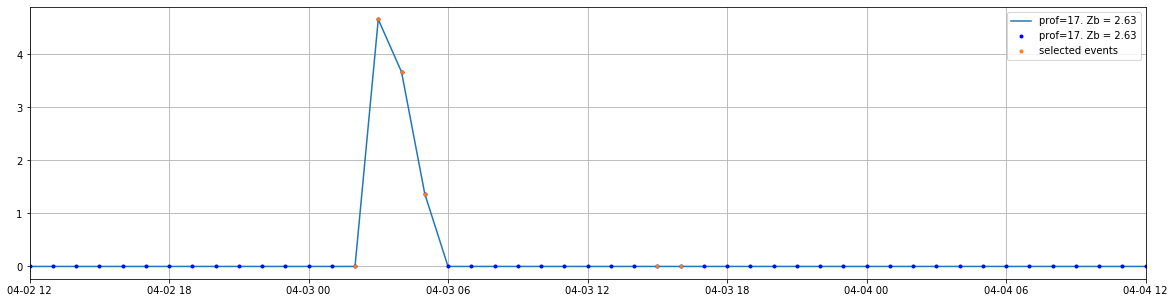

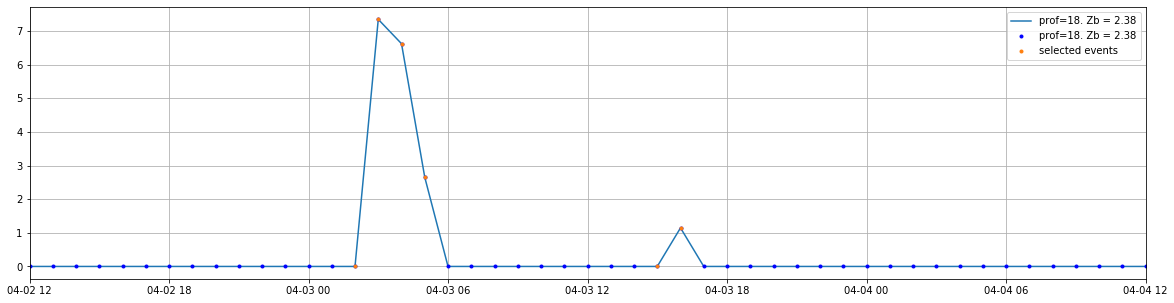

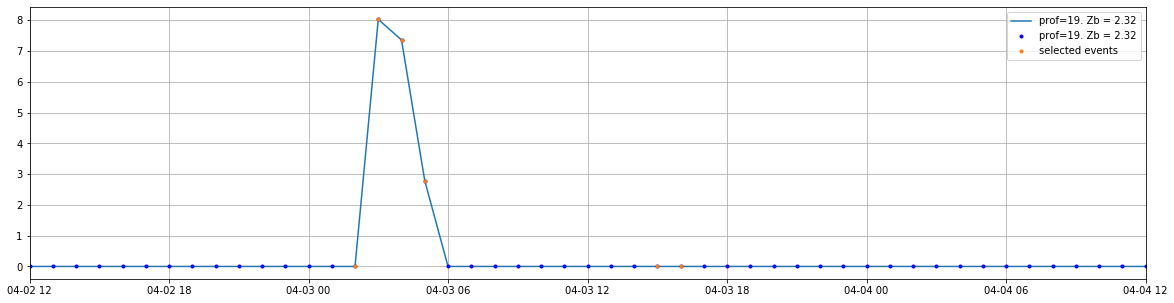

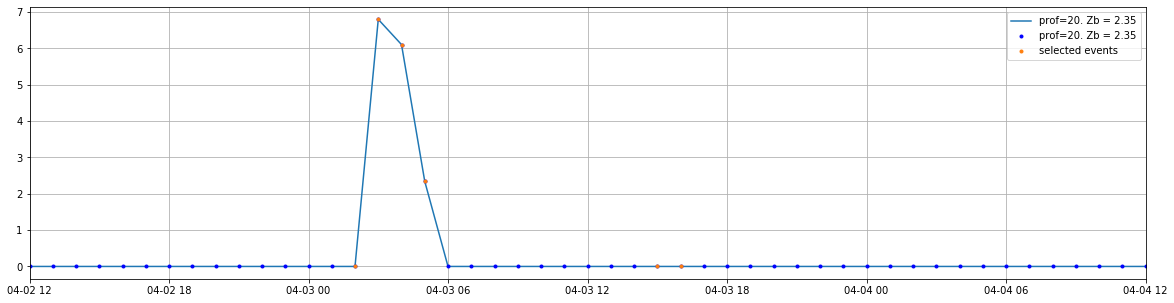

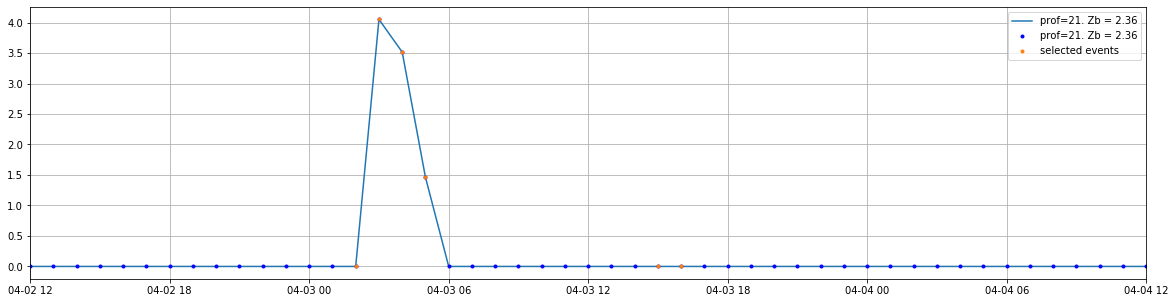

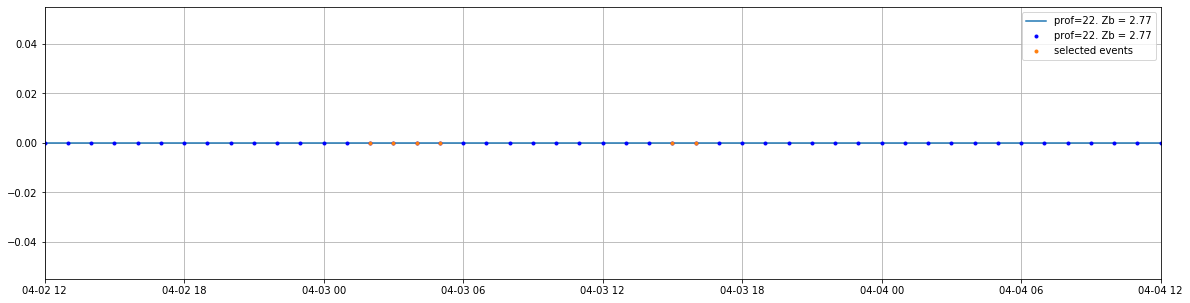

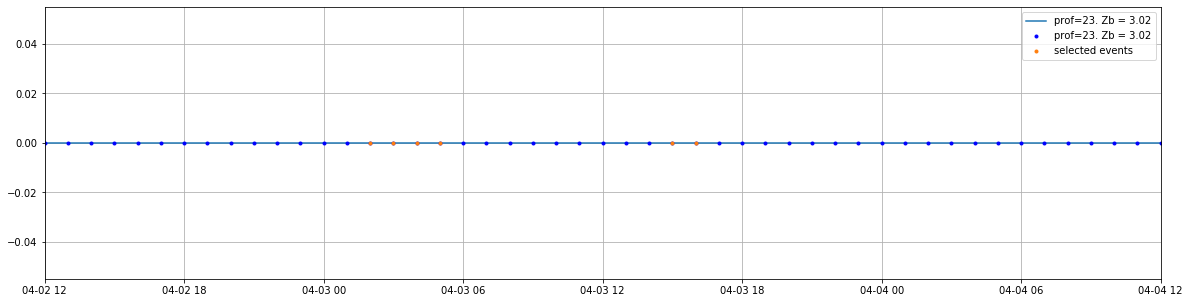

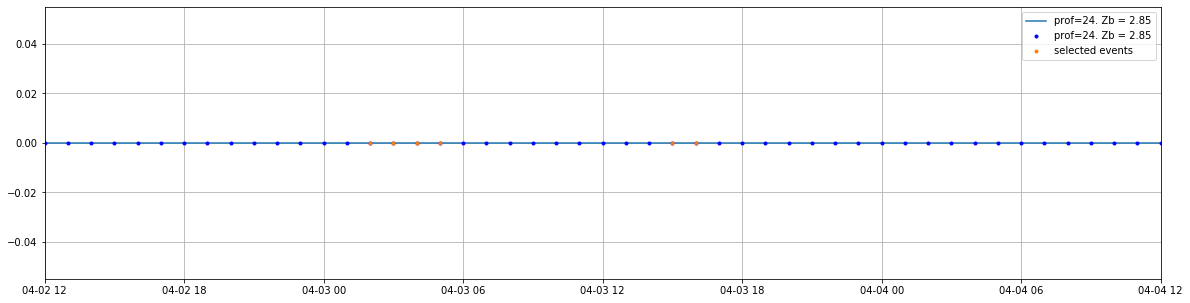

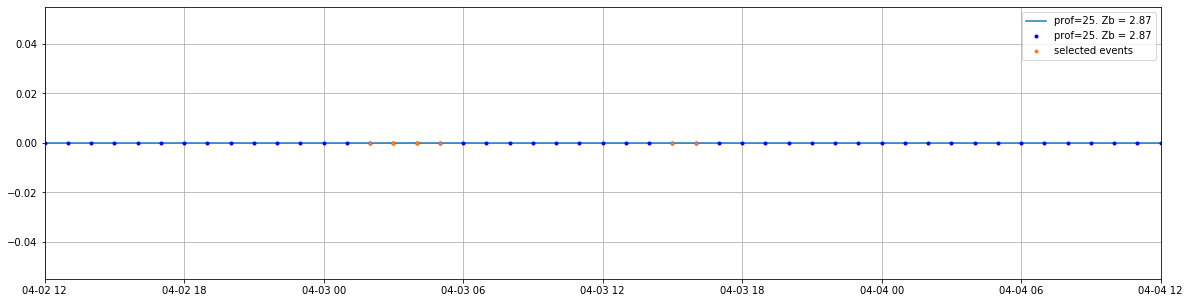

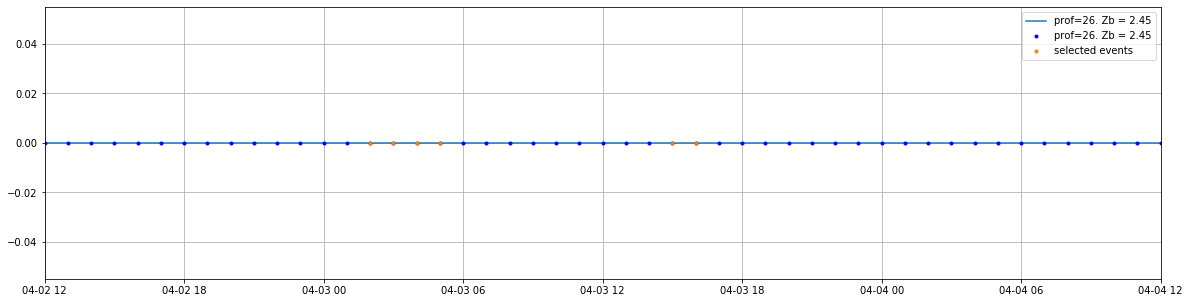

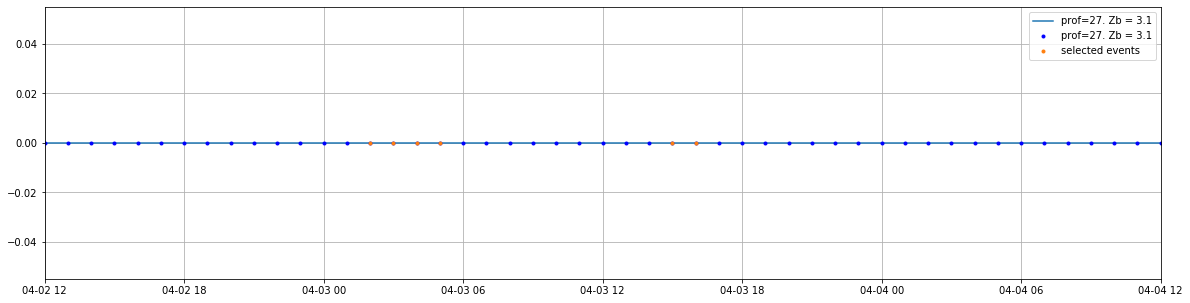

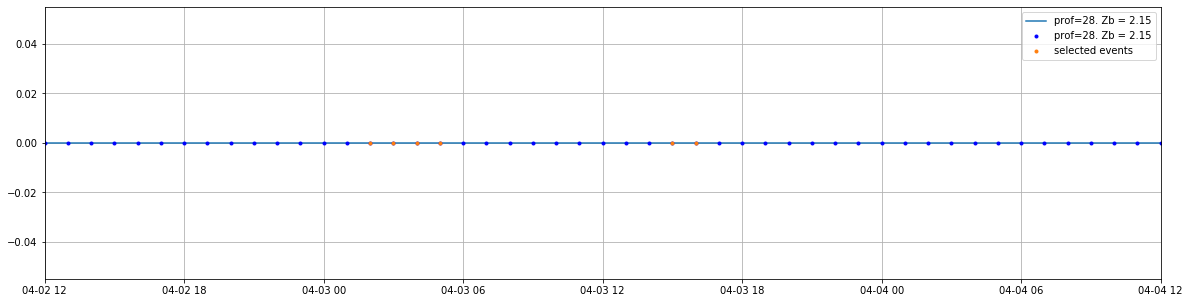

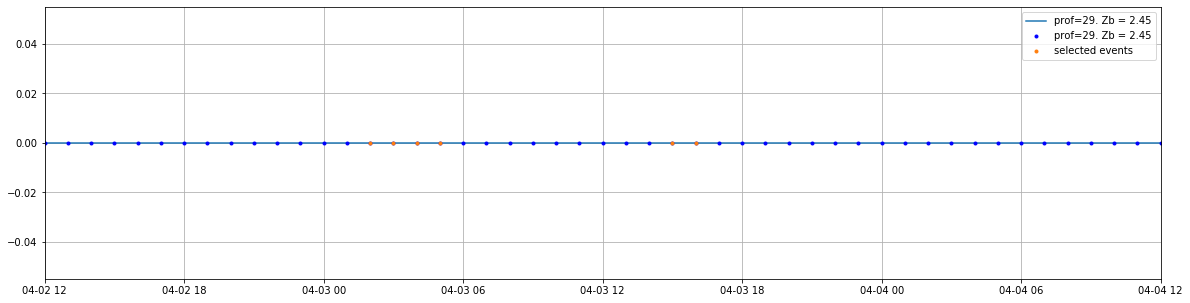

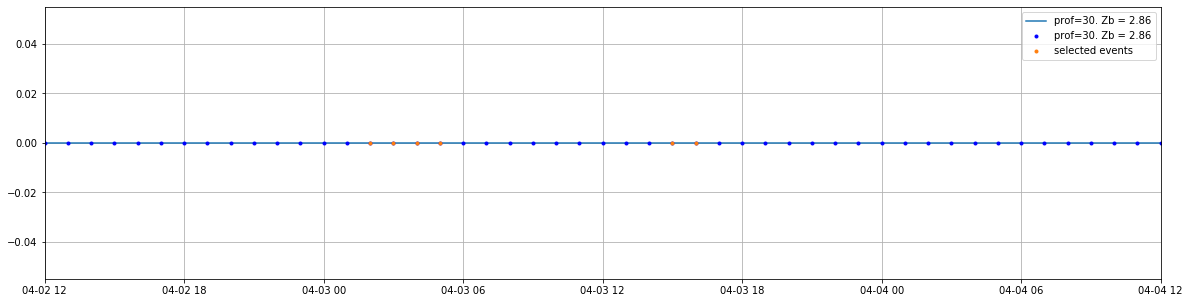

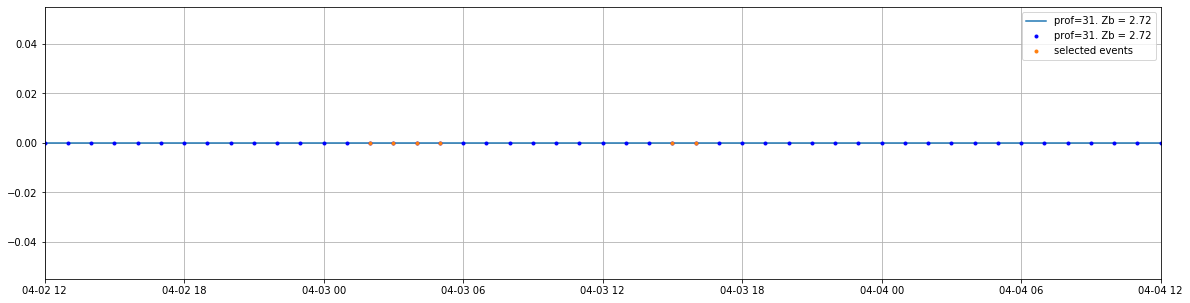

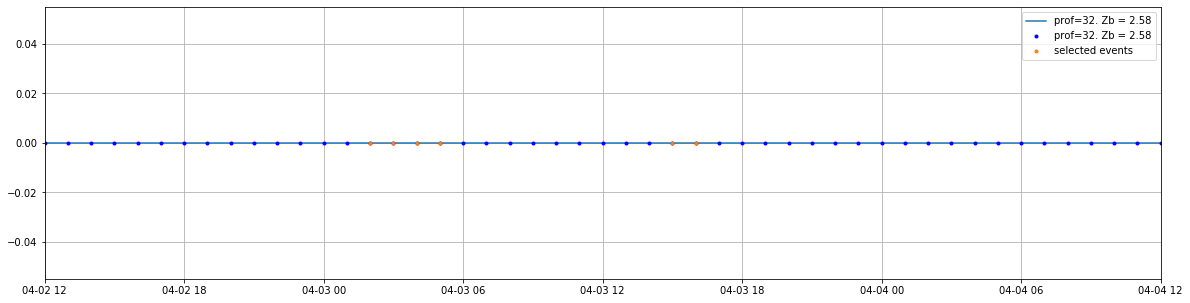

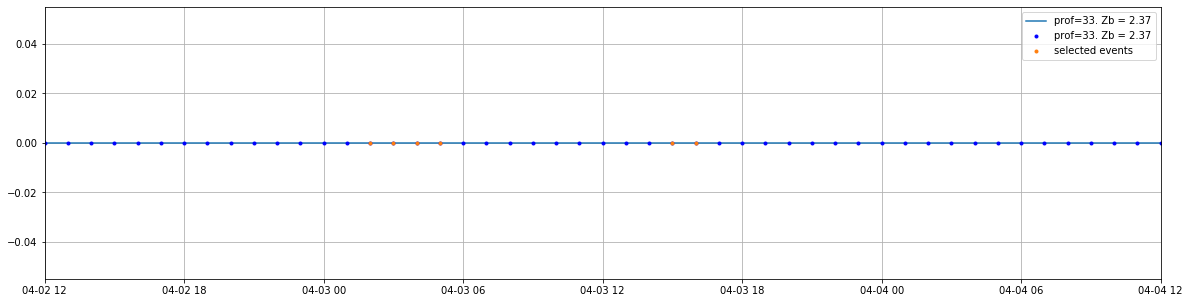

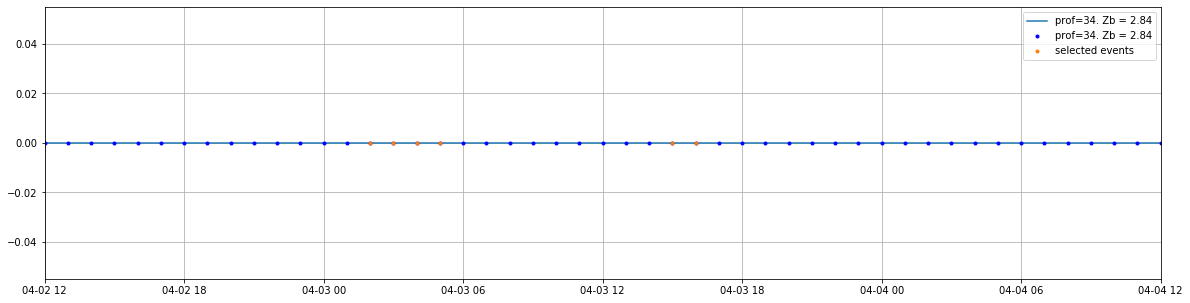

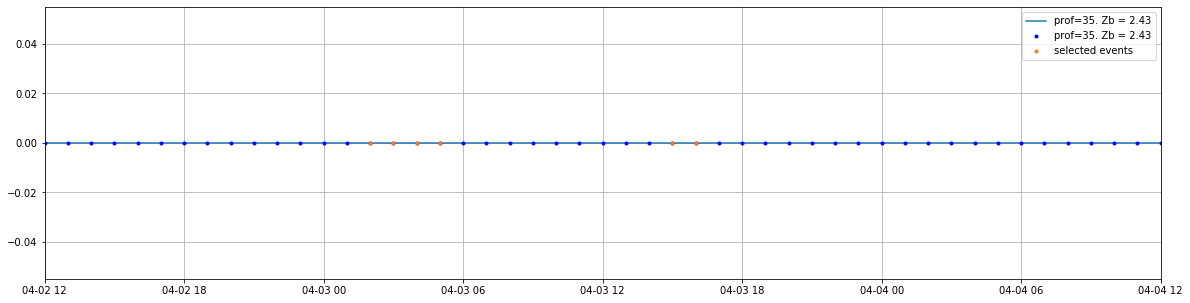

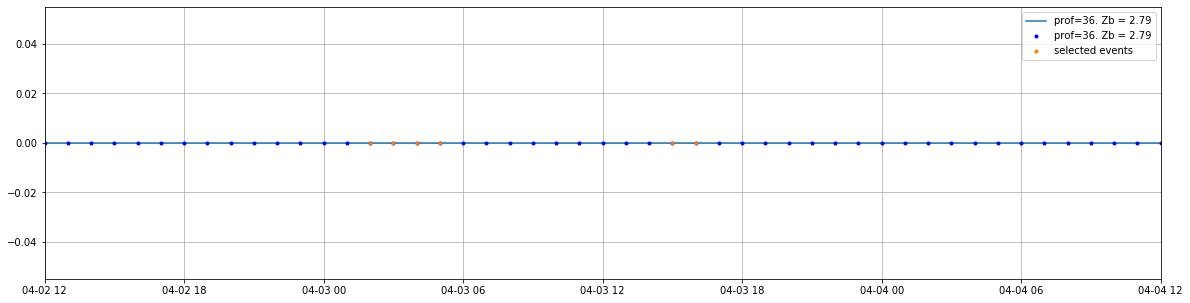

In [5]:
# plot zoom

plt.figure(figsize=(20,10))
plt.plot(hist_Q_wavesH.time, hist_Q_wavesH.Qinv.sum(dim='profile'), label='sum all profiles')
plt.plot(hist_Q_wavesH.time, hist_Q_wavesH.Qinv.sum(dim='profile'),'.b', label='sum all profiles')
plt.plot(Q_all.time, Q_all.values, '.',label='selected events')
plt.xlim(datetime(1981,4,2,12),datetime(1981,4,4,12))
#plt.ylim(-5,160)
plt.legend()
plt.grid()

for p in range(1,37):
    plt.figure(figsize=(20,5))
    plt.plot(hist_Q_wavesH.time, hist_Q_wavesH.Qinv.sel(profile=p), label=('prof=' + str(p) + '. Zb = ' + str(round(hist_Q_wavesH.Zb.sel(profile=p).values[0],2))))
    plt.plot(hist_Q_wavesH.time, hist_Q_wavesH.Qinv.sel(profile=p), '.b', label=('prof=' + str(p) + '. Zb = ' + str(round(hist_Q_wavesH.Zb.sel(profile=p).values[0],2))))
    plt.plot(output.time, output.sel(profile=p), '.', label='selected events')    
    
    plt.xlim(datetime(1981,4,2,12),datetime(1981,4,4,12))
    plt.legend()
    plt.grid()

    

In [6]:

print(output)

<xarray.DataArray 'Qinv' (profile: 36, time: 350268)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-16T11:00:00
  * profile  (profile) float64 1.0 2.0 3.0 4.0 5.0 ... 32.0 33.0 34.0 35.0 36.0


In [7]:
#----------------------    
# Save

# from l/s/m to m3/s/m
output = output/1000 

output = output.to_dataset()
output.attrs["units"] = "m3/s/m"


output.to_netcdf(op.join(p_data, 'sites/KWAJALEIN/HYCREWW/hist_Q_hydrograms.nc'))

print(output)


<xarray.Dataset>
Dimensions:  (profile: 36, time: 350268)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2018-12-16T11:00:00
  * profile  (profile) float64 1.0 2.0 3.0 4.0 5.0 ... 32.0 33.0 34.0 35.0 36.0
Data variables:
    Qinv     (profile, time) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    units:    m3/s/m
